In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats
import seaborn as sb
from scipy.stats import chi2
from sklearn.model_selection import GroupShuffleSplit
from numpy.random import SeedSequence
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [2]:
def test_p_eff(k = 5, chi_param = 1, tests =2000, pass_frac = 0.95, fail = 1.2, rng = default_rng(42)):
    a = rng.chisquare(chi_param, tests)
    crit = chi2.ppf(pass_frac, chi_param)
    scaling = crit/fail
    a_scaled = a/scaling
    temp_pools = []
    gaps = np.arange(0,len(a_scaled),k)
    for i in gaps:
        b = np.mean(a_scaled[i:i+k])
        temp_pools.append(b)

    count = 0
    for i in temp_pools:
        if i >= fail/k:
            count += 1
    total_tests = count * k + len(temp_pools)
    # print("Pools failing the pooled test criteria: {}".format(count))
    # print("Tests needed in the pool stage: {}".format(len(temp_pools)))
    # print("Total tests needed: {}".format(total_tests))
    # print("Total tests needed for individual tests: {}".format(len(a_scaled)))
    # print("Pooled testing requirement compared to individual tests: {:.2%}".format(total_tests/len(a_scaled)))
    print("ran 1")
    return total_tests/len(a_scaled)
    

ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 1
ran 

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

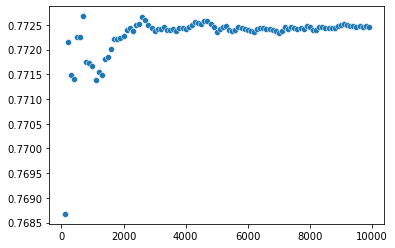

In [3]:
no_tests =10000
tests = np.empty((no_tests, 1), float)

tests[:] = np.nan
# print(tests)
alpha = SeedSequence().entropy
for i in np.arange(no_tests):
    # print(i)
    b = i + 50
    # print(b)
    tests[i] = test_p_eff(rng = default_rng(alpha + b))

print("Average pooled tests required: {:.2%}".format(np.mean(tests)))
    

test_counts = np.arange(0, no_tests, 100)
cum_mean = np.zeros((len(test_counts)))
for c,v in enumerate(test_counts):
    cum_mean[c] = np.mean(tests[:v])
sb.scatterplot(x=test_counts, y=cum_mean)


    

Average pooled tests required: 58.79% for a pool size of 2


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


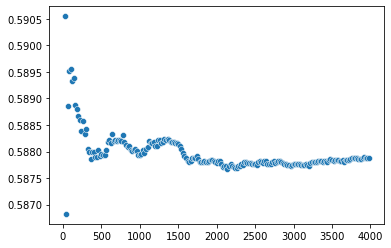

Average pooled tests required: 60.23% for a pool size of 3


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


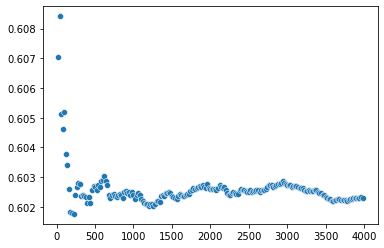

Average pooled tests required: 69.10% for a pool size of 4


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


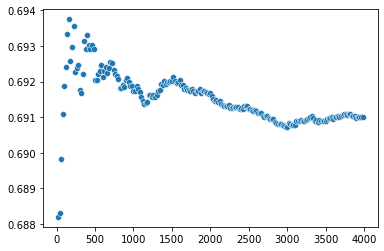

Average pooled tests required: 77.28% for a pool size of 5


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


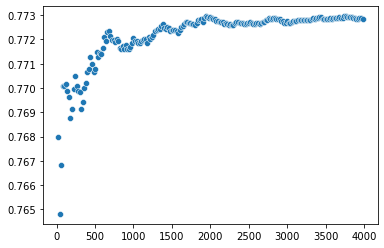

Average pooled tests required: 83.70% for a pool size of 6


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


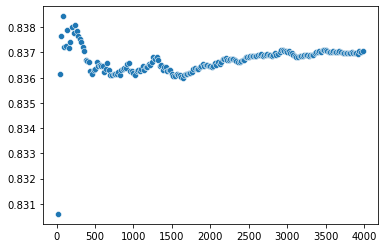

Average pooled tests required: 88.32% for a pool size of 7


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


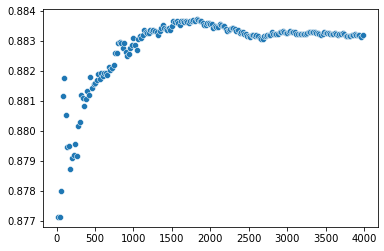

Average pooled tests required: 91.67% for a pool size of 8


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


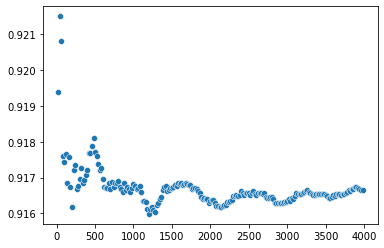

Average pooled tests required: 94.39% for a pool size of 9


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


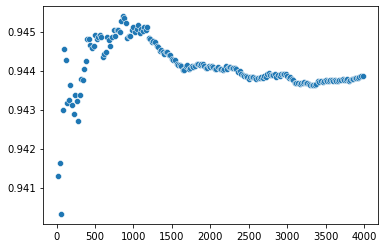

In [72]:
for kk in np.arange(2,10):
    no_tests =4000
    tests = np.empty((no_tests, 1), float)

    tests[:] = np.nan
    # print(tests)
    alpha = SeedSequence().entropy
    for i in np.arange(no_tests):
        # print(i)
        b = i + 50
        # print(b)
        tests[i] = test_p_eff(k=kk, rng = default_rng(alpha + b))

    print("Average pooled tests required: {:.2%} for a pool size of {}".format(np.mean(tests), kk))


    test_counts = np.arange(0, no_tests, 20)
    cum_mean = np.zeros((len(test_counts)))
    for c,v in enumerate(test_counts):
        cum_mean[c] = np.mean(tests[:v])
    sb.scatterplot(x=test_counts, y=cum_mean)
    plt.show()

In [4]:
kk_val = [2,3,4,5,6,7,8,9,10]
per_fail=[.75, .8, .85, .9, .95, .975, .99, .999]
test_matrix = np.zeros((len(kk_val),len(per_fail)))

In [120]:

# print(test_matrix)
# print(test_matrix.shape)
tt= []
for c,v in enumerate(per_fail):
    for cc,vv in enumerate(kk_val):
        no_tests = 4000
        tests = np.empty((no_tests, 1), float)

        tests[:] = np.nan
        # print(tests)
        alpha = SeedSequence().entropy
        for i in np.arange(no_tests):
            # print(i)
            b = i + 50
            # print(b)
            tests[i] = test_p_eff(k=vv, pass_frac=v, rng = default_rng(alpha + b))
        t_mean =np.mean(tests)
        print("Average pooled tests required: {:.2%} for a pool size of {}, pass rate of: {}".format(t_mean, vv, v))
        test_matrix[c-1,cc-1]=t_mean
        tt.append([v,vv,t_mean])

Average pooled tests required: 101.61% for a pool size of 2, pass rate of: 0.75
Average pooled tests required: 105.74% for a pool size of 3, pass rate of: 0.75
Average pooled tests required: 110.76% for a pool size of 4, pass rate of: 0.75
Average pooled tests required: 113.24% for a pool size of 5, pass rate of: 0.75
Average pooled tests required: 113.87% for a pool size of 6, pass rate of: 0.75
Average pooled tests required: 113.15% for a pool size of 7, pass rate of: 0.75
Average pooled tests required: 112.02% for a pool size of 8, pass rate of: 0.75
Average pooled tests required: 111.27% for a pool size of 9, pass rate of: 0.75
Average pooled tests required: 109.94% for a pool size of 10, pass rate of: 0.75
Average pooled tests required: 94.00% for a pool size of 2, pass rate of: 0.8
Average pooled tests required: 98.41% for a pool size of 3, pass rate of: 0.8
Average pooled tests required: 105.12% for a pool size of 4, pass rate of: 0.8
Average pooled tests required: 109.60% for a

In [121]:
# print(tt)
# print(tt[1][0])
fails = []
batches = []
effs = []
for i in tt:
    fails.append(i[0])
    batches.append(i[1])
    effs.append(i[2])
fail_array = np.array(fails)
batch_array= np.array(batches)
eff_array = np.array(effs)
matey = pd.DataFrame({"fail":fail_array, "batch":batch_array, "eff":eff_array})
matey.head()

,fail,batch,eff
0,0.75,2,1.016081
1,0.75,3,1.057382
2,0.75,4,1.107571
3,0.75,5,1.132443
4,0.75,6,1.138677


<AxesSubplot:>

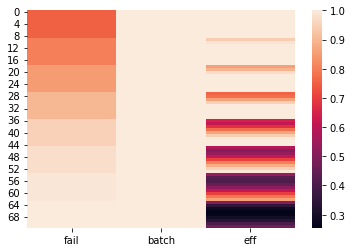

In [122]:
sb.heatmap(matey, vmax=1)

In [123]:
matey

,fail,batch,eff
0,0.750,2,1.016081
1,0.750,3,1.057382
2,0.750,4,1.107571
3,0.750,5,1.132443
4,0.750,6,1.138677
...,...,...,...
67,0.999,6,0.261279
68,0.999,7,0.290075
69,0.999,8,0.336339
70,0.999,9,0.400593


In [124]:
y = matey.fail.unique()
x= matey.batch.unique()
z = matey.eff.to_numpy()
z = z.reshape(8,-1)
print(z.shape, y.shape, x.shape)

# plt.contour([x, y], z)

(8, 9) (8,) (9,)


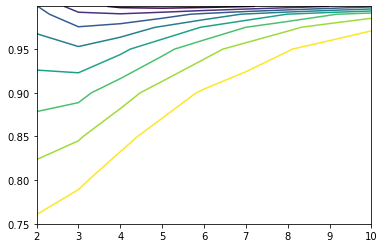

In [125]:
plt.contour(x,y, z, levels = [.3, .4, .5, .6, .7, .8, .9, 1])
plt.show()

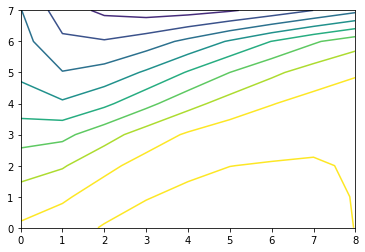

In [126]:
plt.contour(z, levels=10, vmax=1)
plt.show()

In [5]:
def wrapper_calc(arg_dict):
    kwargs = arg_dict
    return test_p_eff(**kwargs)

In [6]:
kk_val = [2,3,4,5,6,7,8,9,10]
per_fail=[.75, .8, .85, .9, .95, .975, .99, .999]
test_matrix = np.zeros((len(kk_val),len(per_fail)))
# print(test_matrix)
# print(test_matrix.shape)
tt= []
with Pool(processes=4) as pool:
    for c,v in enumerate(per_fail):
        for cc,vv in enumerate(kk_val):
            no_tests = 40
            tests = np.empty((no_tests, 1), float)

            tests[:] = np.nan
            # print(tests)
            alpha = SeedSequence().entropy
            args = np.arange(no_tests) + alpha
            dic_list = []
            base_dic = {"k":vv, "pass_frac":v}
            for i in args:
                base_dic["rng"] = i
                dic_list.append(base_dic)

            tests = pool.map(wrapper_calc, dic_list)
            # for i in np.arange(no_tests):
            #     # print(i)
            #     b = i + 50
            #     # print(b)
            #     blank = pool.apply_async(test_p_eff, kwds={"k":vv, "pass_frac":v, "rng":default_rng(alpha + b)})
                
            t_mean =np.mean(tests)
            print("Average pooled tests required: {:.2%} for a pool size of {}, pass rate of: {}".format(t_mean, vv, v))
            test_matrix[c-1,cc-1]=t_mean
            tt.append([v,vv,t_mean])

In [49]:
# As, Cd, Hg and Pb 2, 0.82, 0.4 and 1.2 ug/g
fail_pb = 1.2
fail_as = 2.0
fail_cd = 0.82
fail_hg = 0.4
chi_param = 1
pass_frac = 0.95
k = 5

In [4]:
rng = default_rng(42)
a = rng.chisquare(chi_param, 2000)

<AxesSubplot:ylabel='Count'>

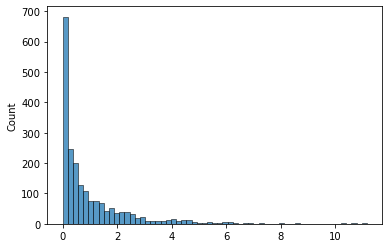

In [5]:
sb.histplot(a)


In [6]:
# i need to use pdf to find where 5%, 1%, 0.1% occurs in the distribution of a and then scale a so that that value then corresponds to fail_x
# dist_continu = [d for d in dir(stats) if

                # isinstance(getattr(stats, d), stats.rv_continuous)]

# print(dist_continu)

In [7]:
crit = chi2.ppf(pass_frac, chi_param)

In [8]:
count = 0 
for i in a:
    if i <= crit:
        count += 1
print(count/len(a))

0.9485


In [9]:
scaling = crit/fail_pb
a_scaled = a / scaling
count = 0
for i in a_scaled:
    if i <= fail_pb:
        count += 1
print(count/len(a_scaled))

0.9485


In [10]:
temp_pools = []
gaps = np.arange(0,len(a_scaled),k)
for i in gaps:
    b = np.mean(a_scaled[i:i+5])
    temp_pools.append(b)

count = 0
for i in temp_pools:
    if i >= fail_pb/k:
        count += 1
total_tests = count * k + len(temp_pools)
print("Pools failing the pooled test criteria: {}".format(count))
print("Tests needed in the pool stage: {}".format(len(temp_pools)))
print("Total tests needed: {}".format(total_tests))
print("Total tests needed for individual tests: {}".format(len(a_scaled)))
print("Pooled testing requirement compared to individual tests: {:.2%}".format(total_tests/len(a_scaled)))

Pools failing the pooled test criteria: 231
Tests needed in the pool stage: 400
Total tests needed: 1555
Total tests needed for individual tests: 2000
Pooled testing requirement compared to individual tests: 77.75%


In [19]:
test_p_eff()

0.7775

In [12]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [13]:
fk = KFold(n_splits=int(len(a_scaled)/k), random_state=42, shuffle = True)
fk.get_n_splits(a_scaled)
for i in fk.split(a_scaled):
    print("Indecies of group are: {}".format(i))


Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 353,  905, 1289, 1333, 1860]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([  65,  938, 1273, 1323, 1731]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([  56,  374,  584, 1118, 1292]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 128,  275,  746, 1646, 1852]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 674, 1083, 1664, 1922, 1981]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([  29,   99,  792,  964, 1179]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 572,  628,  907,  944, 1080]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 254,  450, 1078, 1290, 1609]))
Indecies of group are: (array([   0,    1,    2, ..., 1997, 1998, 1999]), array([ 124,  251,  58

In [14]:
c = np.array([0,1,2,3,4,5,6])
d = c.copy()
np.random.shuffle(d)
print(c)
print(d)

[0 1 2 3 4 5 6]
[4 3 2 5 1 0 6]


In [15]:
matrix = np.empty((k,k))
matrix[:] = np.nan
matrix.shape

(5, 5)

In [16]:
matrix

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])